In [1]:
# Import Libraries
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

![Alt text](image.png)

**AND Gate**
|Input 1	|Input 2	|Output|
| --------- | -------- | ------- |
|0	|0	|0|
|0	|1	|0|
|1	|0	|0|
|1	|1	|1|

**XOR Gate**
|Input 1	|Input 2	|Output|
| --------- | -------- | ------- |
|0	|0	|0|
|0	|1	|1|
|1	|0	|1|
|1	|1	|0|

In [15]:
# Create a dataset with the four possible inputs for an AND gate
data = [[0, 0], [0, 1], [1, 0], [1, 1]]

# Create the labels for each data point
labels = [0, 0, 0, 1]

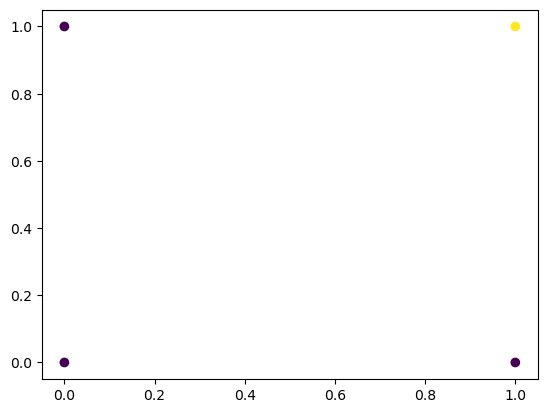

In [16]:
# Plot the four points
plt.scatter([point[0] for point in data], [point[1] for point in data], 
            c = labels)
plt.show()

The data is linearly separable because you can draw a straight line that completely separates the points of each class.

In [94]:
# Build perceptron to learn AND
# max_iter sets the number of times the perceptron loops through the training data.
classifier = Perceptron(max_iter=40, random_state=22)

# Train the model
classifier.fit(data, labels)

# Check .score to see if the algorithm learned AND
classifier.score(data, labels)

1.0

In [83]:
# Change the labels so data represents the XOR gate
labels = [0, 1, 1, 0]

# check .score with XOR labels
classifier.score(data, labels)

0.25

In [19]:
# Change the labels so data represents the OR gate
labels = [0, 1, 1, 1]

# check .score with OR labels
classifier.score(data, labels)

0.5

In [95]:
# Reset label back to AND gate
labels = [0, 0, 0, 1]

# Check distance points from the decision boundary using .decision_function
classifier.decision_function([[0, 0], [1, 1], [0.5, 0.5]])

array([-4. ,  1. , -1.5])

In [96]:
# Create list of points as input for .decision_function to create heatmap
x_values = np.linspace(0, 1, 100)
y_values = np.linspace(0, 1, 100)

# Find every possible combination of the x and y values
point_grid = list(product(x_values, y_values))

# Use .decision_function on the point_grid
distances = classifier.decision_function(point_grid)

# Take the absolute value of every distance
abs_distances = [abs(pt) for pt in distances]

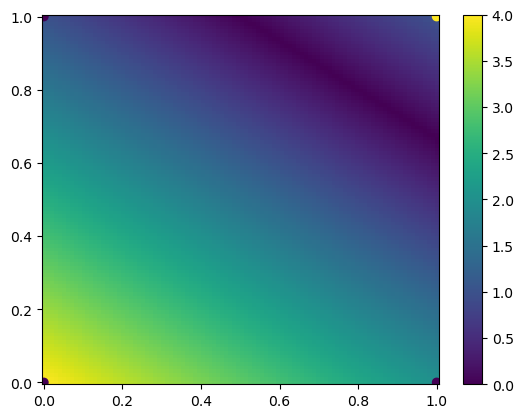

In [97]:
## Draw the heatmap
# Turn abs_distance into a two dimensional list for the pcolormesh() function
distances_matrix = np.reshape(abs_distances, (100, 100))

# Create heatmap
heatmap = plt.pcolormesh(x_values, y_values, distances_matrix)
plt.colorbar(heatmap)
plt.scatter([point[0] for point in data], [point[1] for point in data], 
            c = labels)
plt.show()